<a href="https://colab.research.google.com/github/nicholasproietti/LGM/blob/TESS/aceess_to_tess_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.1 Install eleanor](#first-bullet)

[1.2 Get the name of stars from table](#second-bullet)

[1.3 Get LC](#third-bullet)

[1.4 ](#fourth-bullet)

# 1.1 Install eleanor <a class="anchor" id="first-bullet"></a>

In [ ]:
 !pip install eleanor
 !pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 8.6 MB/s 
     |████████████████████████████████| 826 kB 53.4 MB/s 
     |████████████████████████████████| 247 kB 57.1 MB/s 
     |████████████████████████████████| 4.5 MB 34.3 MB/s 
     |████████████████████████████████| 832 kB 64.6 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 4.0 MB 22.8 MB/s 
     |████████████████████████████████| 1.6 MB 7.7 MB/s 
     |████████████████████████████████| 98 kB 6.7 MB/s 
     |████████████████████████████████| 41 kB 207 kB/s 
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144485 sha256=c98d74a67a649d3fd6228c209331aeed4ec451f881de5d16b095488e49a87f7f
  Stored in directory: /root/.cache/pip/wheels/f8/cb/ec/8b5b8fd5a7281de8a9db2767b7b37bf11bf65b0b661c7484ab
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl si

# 1.2 Get the name list of stars from table <a class="anchor" id="second-bullet"></a>

In [ ]:
# import eleanor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
TESS_table = pd.read_csv('PS_2022.09.29_07.42.37.csv')
TESS_table.shape
print(TESS_table['pl_name'])

0           AU Mic b
1           AU Mic c
2         DS Tuc A b
3          GJ 1252 b
4           GJ 143 b
           ...      
251       WASP-126 c
252       WASP-132 c
253        WASP-18 c
254    WD 1856+534 b
255         pi Men c
Name: pl_name, Length: 256, dtype: object


# 1.3 Get LC <a class="anchor" id="second-bullet"></a>

In [ ]:
# LC_table = pd.DataFrame([])
# LC_time_table = pd.DataFrame([])
# pl_name_table = pd.DataFrame([])
# for pl_name in TESS_table['pl_name']:
#   try:
#     star = eleanor.Source(name=pl_name, sector=1)
#     data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_pca=True, regressors='corner')
#     q = data.quality == 0
#   except(TypeError, IndexError, ValueError ):
#     print('ingoring star '+ pl_name)
#     continue
#   else:
#     LC = data.raw_flux[q]/np.nanmean(data.raw_flux[q])
#     LC_time = data.time[q]
#     LC_table.join(pd.DataFrame({pl_name: LC}))
#     LC_time_table.join(pd.DataFrame({pl_name: LC_time}))
#     print('added '+pl_name+' to table')
    

In [ ]:
import lightkurve as lk
import pandas as pd
lcFlux = pd.DataFrame([])
lcTime = pd.DataFrame([])
plName = pd.DataFrame([])
for pl_name in TESS_table['pl_name']:
  tpf = lk.search_targetpixelfile(pl_name).download_all()
  if tpf == None:
    print('ignoring '+pl_name+'!')
    continue
  else:
    cdpp=[]
    for tpfi in tpf:
      lc = tpfi.to_lightcurve(aperture_mask=tpfi.pipeline_mask)
      cdpp.append(float(lc.estimate_cdpp()))
    minCdppIndex = cdpp.index(min(cdpp))
    minCdppTpf = tpf[minCdppIndex]
    lc=minCdppTpf.to_lightcurve(aperture_mask=minCdppTpf.pipeline_mask)
    lcFlux.join(pd.DataFrame({pl_name: lc.flux.value/np.nanmean(lc.flux.value)}))
    lcTime.join(pd.DataFrame({pl_name: lc.time.value}))
    
    print('added '+pl_name+' to table')
    break


added AU Mic b to table


In [ ]:
# import matplotlib.pyplot as plt
pl_name='TIC 307210830 c'
tpf = lk.search_targetpixelfile(pl_name).download_all()
if tpf == None:
  print('ignoring '+pl_name+'!')
else:
  cdpp=[]
  for tpfi in tpf:
    lc = tpfi.to_lightcurve(aperture_mask=tpfi.pipeline_mask)
    cdpp.append(float(lc.estimate_cdpp()))
  minCdppIndex = 0
  minCdppTpf = tpf[minCdppIndex]
  lc=minCdppTpf.to_lightcurve(aperture_mask=minCdppTpf.pipeline_mask)
  lcFlux.join(pd.DataFrame({pl_name: lc.flux.value/np.nanmean(lc.flux.value)}))
  lcTime.join(pd.DataFrame({pl_name: lc.time.value}))

plt.figure(figsize=(15,5))
plt.plot(lc.time.value, lc.flux.value/np.nanmean(lc.flux.value), 'y',linewidth=0.5)
lc_bin=lc.bin(time_bin_size=0.025)
plt.plot(lc_bin.time.value,lc_bin.flux.value/np.nanmean(lc_bin.flux.value), 'r',linewidth=1)


NameError: ignored

In [ ]:
tpf0=tpf[0]
lc=tpf0.to_lightcurve(aperture_mask=tpf0.pipeline_mask)
type(lc)

lightkurve.lightcurve.TessLightCurve

In [ ]:
 test = pd.DataFrame({'data1':lc.time.value})

In [ ]:
test=test.join(pd.DataFrame({'data3':lc.time.value-1000}))
test

,data1,data2,data3
0,1325.346624,325.346624,325.346624
1,1325.367457,325.367457,325.367457
2,1325.388291,325.388291,325.388291
3,1325.409125,325.409125,325.409125
4,1325.429959,325.429959,325.429959
...,...,...,...
1179,1353.076275,353.076275,353.076275
1180,1353.097109,353.097109,353.097109
1181,1353.117942,353.117942,353.117942
1182,1353.138775,353.138775,353.138775


added DS Tuc A b to table


(0.0, 25.0, 0.9975, 1.0025)

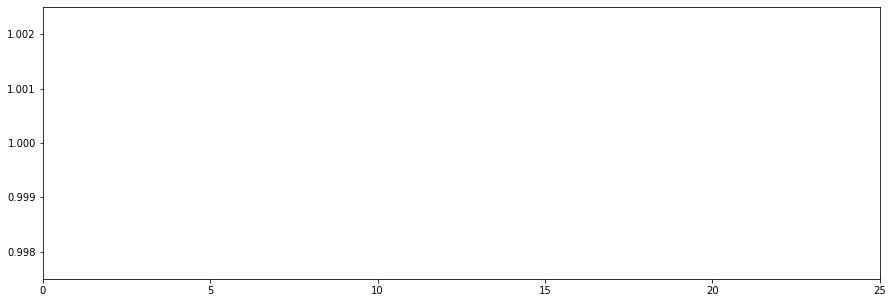

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))
for pl_name in TESS_table['pl_name']:
  pl_name='DS Tuc A b'
  tpf = lk.search_targetpixelfile(pl_name).download_all()
  if tpf == None:
    print('ignoring '+pl_name+'!')
    continue
  else:
    cdpp=[]
    for kc, tpfi in enumerate(tpf):
      lc = tpfi.to_lightcurve(aperture_mask=tpfi.pipeline_mask)
      plt.plot(lc.time.value,lc.flux.value/np.nanmean(lc.flux.value),'.-',linewidth=1)
      break
    

      
    print('added '+pl_name+' to table')
    break
plt.axis([0, 25, 0.9975, 1.0025])
    



(1332.0, 1334.0, 0.97, 1.02)

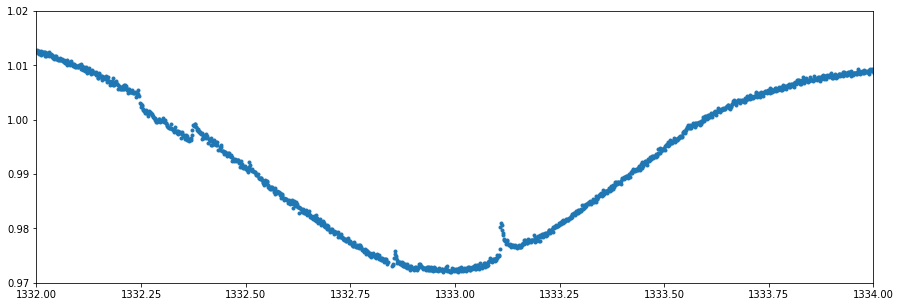

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(lc.time.value,lc.flux.value/np.nanmean(lc.flux.value),'.',linewidth=0.1)
plt.axis([1332, 1334, 0.97, 1.02])

plt.plot(lc.time.value,lc.flux.value/np.nanmean(lc.flux.value),'.-',linewidth=1)

added DS Tuc A b to table


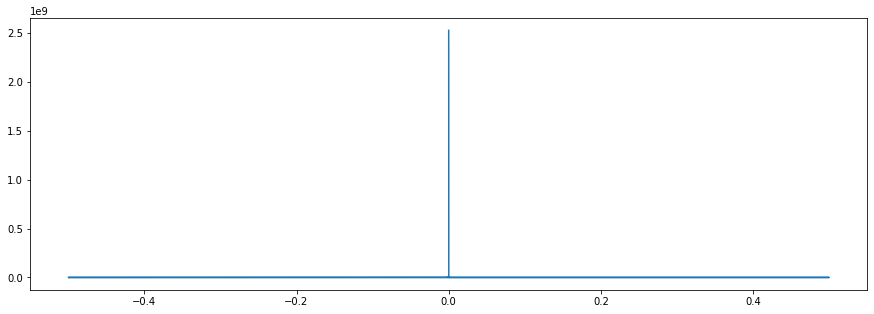

In [ ]:
plt.figure(figsize=(15,5))
for pl_name in TESS_table['pl_name']:
  pl_name='DS Tuc A b'
  tpf = lk.search_targetpixelfile(pl_name).download_all()
  if tpf == None:
    print('ignoring '+pl_name+'!')
    continue
  else:
    cdpp=[]
    for kc, tpfi in enumerate(tpf):
      lc = tpfi.to_lightcurve(aperture_mask=tpfi.pipeline_mask)
      lc = lc.remove_outliers(sigma=2)
      t=lc.time.value-np.min(lc.time.value)
      flx=lc.flux.value
      flx[np.isnan(flx)]=1.0
      sp = np.fft.fft(flx)
      freq = np.fft.fftfreq(len(t))
      plt.plot( freq, np.abs(sp))
      break

      
    

      
    print('added '+pl_name+' to table')
    break

# plt.axis([0, 10, -1000, 1000])

In [ ]:
sp

array([ 2.52842817e+09-6.80884114e-08j, -8.07751364e+05-4.83027550e+06j,
       -1.06097227e+05-2.98454254e+05j, ...,
        1.73454162e+06+1.05562994e+06j, -1.06097227e+05+2.98454254e+05j,
       -8.07751364e+05+4.83027550e+06j])

In [ ]:

flx[np.isnan(flx)]=1.0
flx[14*40]


1.0

In [ ]:
# plt.figure(figsize=(15,5))

# q = data.quality == 0

# plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k')
# plt.plot(data.time[q], data.raw_flux[q]/np.nanmean(data.raw_flux[q]), 'b')